In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 17.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [12]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16725, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 16725 (delta 12), reused 17 (delta 5), pack-reused 16679
Receiving objects: 100% (16725/16725), 15.31 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (11491/11491), done.


In [ ]:
import os
import xml.etree.ElementTree as ET

# Define class names and their respective IDs
class_names = {
    'TV': 0,
    'bedrail': 1,
    'bedside_monitor': 2,
    'bedside_table': 3,
    'breathing_tube': 4,
    'cabinet': 5,
    'chair': 6,
    'computer': 7,
    'counter': 8,
    'countertop': 9,
    'curtain': 10,
    'dispenser': 11,
    'door_handle': 12,
    'drawer': 13,
    'electrosurgical_unit': 14,
    'elevator_panel': 15,
    'exam_table': 16,
    'faucet': 17,
    'foot_board': 18,
    'hallway_assist_bar': 19,
    'handle': 20,
    'hospital_bed': 21,
    'hs': 22,
    'incubator': 23,
    'infusion_pump': 24,
    'iv_pole': 25,
    'keyboard': 26,
    'light_switch': 27,
    'medical_drawer': 28,
    'medical_waste_container': 29,
    'mouse': 30,
    'operating_bed': 31,
    'overbed_table': 32,
    'panda_baby_warmer': 33,
    'patient': 34,
    'person': 35,
    'press_to_open': 36,
    'push_latch': 37,
    'restroom_assist_bar': 38,
    'sequential_compression': 39,
    'sink': 40,
    'sofa': 41,
    'staff': 42,
    'surgical_instrument': 43,
    'surgical_light': 44,
    'syringe_pump': 45,
    'table': 46,
    'telephone': 47,
    'toilet': 48,
    'toilet_handle': 49,
    'tv': 50,
    'utility_cart': 51,
    'ventilator': 52,
    'visitor': 53,
    'waste_bin': 54,
    'wheel_chair': 55,
    'xray_bed': 56,
    'xray_machine': 57
}

# Function to convert XML annotations to YOLO format
def convert_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get image dimensions
    size = root.find('size')
    img_width = float(size.find('width').text)
    img_height = float(size.find('height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name not in class_names:
            continue

        class_id = class_names[obj_name]
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        # Calculate YOLO format values
        x_center = (xmin + xmax) / (2.0 * img_width)
        y_center = (ymin + ymax) / (2.0 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_lines

# Directory containing XML files
input_dir = '/content/drive/MyDrive/Hospital_Scene_Data/val/labels'  # Update this to your directory

# Process each XML file in the directory
for filename in os.listdir(input_dir):
    if not filename.endswith('.xml'):
        continue

    xml_file = os.path.join(input_dir, filename)
    yolo_lines = convert_annotation(xml_file)

    # Save YOLO format to text file
    output_file = os.path.join(input_dir, filename.replace('.xml', '.txt'))
    with open(output_file, 'w') as f:
        for line in yolo_lines:
            f.write(line + '\n')

print("Conversion completed.")


OSError: [Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Hospital_Scene_Data/val/labels'

In [3]:
ROOT_DIR='/content/gdrive/MyDrive/Hospital_Scene_Data'


In [7]:
!zip '/content/gdrive/MyDrive/Hospital_Scene_Data'



zip error: Nothing to do! (/content/gdrive/MyDrive/Hospital_Scene_Data.zip)


In [10]:
!cp '/content/gdrive/MyDrive/Hospital_Scene_Data.zip'  '/content/'

In [11]:
!unzip '/content/Hospital_Scene_Data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Hospital_Scene_Data/train/images/image_4151.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4152.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4153.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4154.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4155.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4156.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4157.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4158.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4159.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4161.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4163.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4164.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4165.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4168.jpg  
  inflating: Hospital_Scene_Data/train/images/image_4169.jpg  
  in

In [ ]:
import os

from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

In [ ]:
# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "dataset.yaml"), epochs=1)  # train the model

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/Hospital_Scene_Data/dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=58

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/gdrive/MyDrive/Hospital_Scene_Data/train/labels... 3041 images, 20 backgrounds, 0 corrupt: 100%|██████████| 3061/3061 [02:02<00:00, 24.99it/s]


train: New cache created: /content/gdrive/MyDrive/Hospital_Scene_Data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/Hospital_Scene_Data/val/labels... 652 images, 0 backgrounds, 0 corrupt: 100%|██████████| 652/652 [00:28<00:00, 23.03it/s]


val: New cache created: /content/gdrive/MyDrive/Hospital_Scene_Data/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      3.843      5.612      4.228         69        640: 100%|██████████| 192/192 [46:52<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [02:37<00:00,  7.48s/it]


                   all        652       7397    0.00135   0.000478   0.000688   0.000179

1 epochs completed in 0.829 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3016958 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [02:02<00:00,  5.84s/it]


                   all        652       7397    0.00131   0.000478   0.000666   0.000175
                    TV         84         98          0          0          0          0
               bedrail        107        199          0          0          0          0
       bedside_monitor        195        391          0          0          0          0
         bedside_table         39         42          0          0          0          0
        breathing_tube         73         82          0          0          0          0
               cabinet        101        131          0          0          0          0
                 chair        264        718          0          0          0          0
              computer        160        271       0.05    0.00369     0.0253    0.00506
               counter         94        123          0          0          0          0
            countertop        143        198          0          0          0          0
               curtai

In [ ]:
import os
from ultralytics import YOLO

# Define the root directory and dataset path
ROOT_DIR = '/content/gdrive/MyDrive/Hospital_Scene_Data'
dataset_yaml = os.path.join(ROOT_DIR, "dataset.yaml")

# Load a model from scratch
model = YOLO("yolov8n.yaml")  # Specify the model configuration

# Set up training parameters
epochs = 50  # Increase the number of epochs
batch_size = 16  # Adjust batch size if necessary
learning_rate = 0.001  # Adjust learning rate if necessary

# Train the model
results = model.train(
    data=dataset_yaml,
    epochs=epochs,
    batch=batch_size,  # Use the correct argument for batch size
    lr0=learning_rate,  # Use the correct argument for learning rate
    val=True  # Assuming validation is required; adjust if needed
)

# Print training results
print(results)

# Evaluate the model after training
metrics = model.val()
print(metrics)


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/Hospital_Scene_Data/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 33.1MB/s]


Overriding model.yaml nc=80 with nc=58

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 188MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/Hospital_Scene_Data/train/labels.cache... 3041 images, 20 backgrounds, 0 corrupt: 100%|██████████| 3061/3061 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/Hospital_Scene_Data/val/labels.cache... 652 images, 0 backgrounds, 0 corrupt: 100%|██████████| 652/652 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.88G      3.835      5.613      4.227        129        640: 100%|██████████| 192/192 [03:10<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 19/21 [02:12<00:18,  9.39s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [02:18<00:00,  6.62s/it]

                   all        652       7397   0.000569   0.000327   0.000292   8.57e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.02G      3.665      5.279      3.957         65        640: 100%|██████████| 192/192 [01:52<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.40it/s]


                   all        652       7397    0.00181     0.0396    0.00127   0.000333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.82G      3.471      4.919      3.606        128        640: 100%|██████████| 192/192 [01:57<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]


                   all        652       7397      0.143    0.00695    0.00143   0.000587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.99G      3.249      4.604      3.312        126        640: 100%|██████████| 192/192 [01:50<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.34it/s]


                   all        652       7397      0.126     0.0384    0.00328    0.00107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.17G      3.054      4.362      3.069         92        640: 100%|██████████| 192/192 [01:52<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


                   all        652       7397      0.385     0.0108    0.00653     0.0023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.2G      2.875      4.176      2.866        114        640: 100%|██████████| 192/192 [01:53<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


                   all        652       7397      0.428     0.0161     0.0112    0.00422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.02G      2.712      3.995        2.7         94        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.42it/s]


                   all        652       7397      0.384     0.0243     0.0164    0.00636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.97G      2.601      3.866      2.585        107        640: 100%|██████████| 192/192 [01:49<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


                   all        652       7397      0.469     0.0324     0.0249    0.00975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.14G      2.537       3.74      2.496        111        640: 100%|██████████| 192/192 [01:48<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.32it/s]


                   all        652       7397      0.412     0.0399     0.0294      0.012

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.22G      2.462       3.62      2.421        143        640: 100%|██████████| 192/192 [01:52<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]


                   all        652       7397      0.455     0.0392     0.0369     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.99G      2.415      3.561      2.377        119        640: 100%|██████████| 192/192 [01:48<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397      0.421     0.0543     0.0389     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.97G      2.366      3.501      2.324        146        640: 100%|██████████| 192/192 [01:47<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.34it/s]


                   all        652       7397      0.484     0.0598     0.0452     0.0194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.06G      2.337      3.446       2.29        161        640: 100%|██████████| 192/192 [01:52<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


                   all        652       7397      0.498     0.0723     0.0541     0.0235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.02G      2.305      3.388      2.254        145        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.30it/s]


                   all        652       7397      0.535     0.0668      0.056     0.0258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G      2.286      3.355      2.218         75        640: 100%|██████████| 192/192 [01:48<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.51it/s]


                   all        652       7397       0.51     0.0814     0.0667     0.0302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.15G      2.263      3.295      2.195         90        640: 100%|██████████| 192/192 [01:53<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.26it/s]


                   all        652       7397      0.469     0.0891     0.0715     0.0339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.9G      2.229      3.262      2.162        111        640: 100%|██████████| 192/192 [01:51<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


                   all        652       7397      0.447      0.087     0.0743     0.0336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.91G      2.207      3.232      2.145         68        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


                   all        652       7397      0.464     0.0879      0.079     0.0374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.98G      2.188      3.201      2.131         97        640: 100%|██████████| 192/192 [01:47<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.29it/s]


                   all        652       7397      0.458     0.0963     0.0834     0.0397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.19G      2.169      3.154      2.106        108        640: 100%|██████████| 192/192 [01:51<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.44it/s]


                   all        652       7397      0.401      0.111     0.0899     0.0435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.81G      2.164      3.121      2.089         81        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.52it/s]


                   all        652       7397      0.391      0.108     0.0886      0.043

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.37G      2.149       3.12      2.076         60        640: 100%|██████████| 192/192 [01:49<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397      0.423      0.111     0.0946     0.0453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.77G      2.139      3.076      2.056        112        640: 100%|██████████| 192/192 [01:51<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]


                   all        652       7397       0.42      0.123      0.103     0.0503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.91G      2.111      3.051      2.044        121        640: 100%|██████████| 192/192 [01:48<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]


                   all        652       7397      0.376      0.127      0.107     0.0516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.14G      2.108      3.025      2.038        114        640: 100%|██████████| 192/192 [01:53<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


                   all        652       7397      0.492      0.118      0.112     0.0553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.12G      2.096      3.014      2.022         63        640: 100%|██████████| 192/192 [01:51<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.29it/s]


                   all        652       7397      0.407      0.131      0.113     0.0576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.03G       2.09      2.993      2.017         74        640: 100%|██████████| 192/192 [01:48<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.32it/s]


                   all        652       7397      0.403      0.122      0.114     0.0581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         3G      2.076      2.969      1.999         94        640: 100%|██████████| 192/192 [01:56<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.54it/s]


                   all        652       7397      0.382      0.143      0.121     0.0606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.97G      2.075       2.96      1.993        130        640: 100%|██████████| 192/192 [01:51<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.34it/s]


                   all        652       7397      0.431      0.129      0.118     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.75G      2.062      2.949      1.981         69        640: 100%|██████████| 192/192 [01:47<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


                   all        652       7397      0.389      0.145      0.125     0.0622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.81G       2.06       2.92       1.98        116        640: 100%|██████████| 192/192 [01:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]


                   all        652       7397       0.39      0.152      0.133     0.0682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.03G      2.052      2.905      1.968        109        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]


                   all        652       7397      0.377      0.139      0.126     0.0654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.81G      2.049      2.898      1.972        101        640: 100%|██████████| 192/192 [01:49<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]


                   all        652       7397      0.403      0.151      0.131     0.0689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.99G      2.033      2.876      1.945         91        640: 100%|██████████| 192/192 [01:45<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397      0.398      0.146      0.128     0.0669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.05G      2.036      2.857      1.951        179        640: 100%|██████████| 192/192 [01:52<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]


                   all        652       7397      0.413      0.149      0.133     0.0707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.01G      2.023      2.848      1.943        159        640: 100%|██████████| 192/192 [01:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


                   all        652       7397      0.395       0.16      0.133     0.0706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.8G      2.014      2.843      1.942         82        640: 100%|██████████| 192/192 [01:45<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397      0.424      0.162      0.136     0.0733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         3G      2.016      2.833      1.936        132        640: 100%|██████████| 192/192 [01:52<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.64it/s]


                   all        652       7397      0.424      0.161      0.139     0.0756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.79G      2.022      2.824      1.933        110        640: 100%|██████████| 192/192 [01:53<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.42it/s]


                   all        652       7397      0.404      0.166      0.147     0.0783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.18G      2.001      2.816      1.922        146        640: 100%|██████████| 192/192 [01:43<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:19<00:00,  1.07it/s]


                   all        652       7397      0.414      0.168      0.147     0.0774
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.78G      1.978      2.881       1.93         77        640: 100%|██████████| 192/192 [01:49<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.44it/s]


                   all        652       7397      0.351      0.172      0.142     0.0766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.47G      1.958      2.781      1.925         55        640: 100%|██████████| 192/192 [01:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


                   all        652       7397      0.401      0.171       0.15     0.0809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.43G      1.956      2.765       1.91         41        640: 100%|██████████| 192/192 [01:53<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397       0.41      0.164      0.149     0.0808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.42G      1.947      2.747      1.904         29        640: 100%|██████████| 192/192 [01:46<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:19<00:00,  1.05it/s]


                   all        652       7397      0.414      0.171      0.155     0.0835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.43G      1.934      2.732      1.897         65        640: 100%|██████████| 192/192 [01:46<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]


                   all        652       7397      0.424      0.165      0.158     0.0852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.46G      1.935       2.73      1.897         80        640: 100%|██████████| 192/192 [01:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


                   all        652       7397      0.424      0.167      0.156     0.0855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.46G       1.93      2.716      1.891         57        640: 100%|██████████| 192/192 [01:51<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


                   all        652       7397      0.427      0.168      0.158     0.0867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.43G      1.929      2.715      1.897         54        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:15<00:00,  1.37it/s]


                   all        652       7397      0.415      0.173      0.161     0.0878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.45G      1.925      2.708      1.892         39        640: 100%|██████████| 192/192 [01:44<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


                   all        652       7397      0.416      0.176      0.163     0.0886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.43G      1.941      2.713       1.89         61        640: 100%|██████████| 192/192 [01:50<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]


                   all        652       7397      0.423      0.172      0.162     0.0884

50 epochs completed in 1.836 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3016958 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:21<00:00,  1.00s/it]


                   all        652       7397      0.416      0.176      0.162     0.0882
                    TV         84         98      0.281      0.388      0.316      0.202
               bedrail        107        199      0.174      0.101     0.0798     0.0296
       bedside_monitor        195        391      0.379       0.56      0.468      0.256
         bedside_table         39         42       0.31     0.0476     0.0669     0.0472
        breathing_tube         73         82          1          0      0.028    0.00808
               cabinet        101        131      0.291       0.29      0.186     0.0858
                 chair        264        718      0.269      0.447      0.316      0.164
              computer        160        271      0.306      0.376      0.254      0.148
               counter         94        123      0.318      0.504      0.424      0.259
            countertop        143        198      0.199      0.187     0.0926     0.0312
               curtai

val: Scanning /content/gdrive/MyDrive/Hospital_Scene_Data/val/labels.cache... 652 images, 0 backgrounds, 0 corrupt: 100%|██████████| 652/652 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:28<00:00,  1.42it/s]


                   all        652       7397      0.418      0.174      0.162     0.0883
                    TV         84         98      0.295      0.388      0.316      0.201
               bedrail        107        199      0.175      0.101     0.0796     0.0296
       bedside_monitor        195        391      0.387      0.555      0.467      0.257
         bedside_table         39         42      0.325     0.0476     0.0668     0.0474
        breathing_tube         73         82          1          0     0.0264    0.00747
               cabinet        101        131      0.294       0.28      0.184      0.085
                 chair        264        718      0.272      0.443      0.317      0.164
              computer        160        271      0.314      0.376      0.255      0.148
               counter         94        123      0.328      0.504      0.425      0.259
            countertop        143        198      0.202      0.187     0.0915     0.0305
               curtai

In [ ]:
import shutil
import os
from google.colab import files

# Compress the folder
shutil.make_archive('runs', 'zip', 'runs')

# Download the zip file
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/image_2003.jpg: 448x640 1 chair, 1 surgical_light, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: 'person', 36: 'press_to_open', 37:

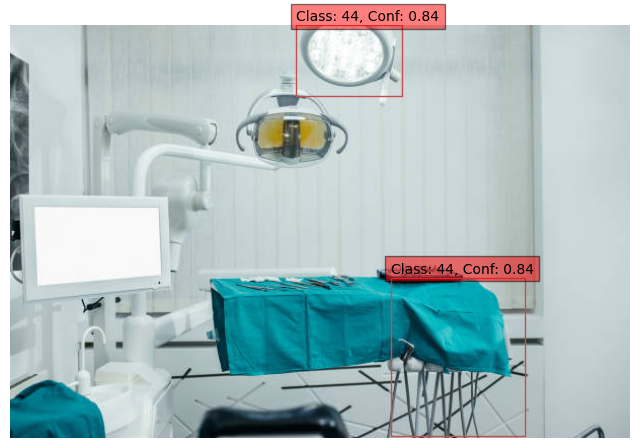

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the trained model with the best weights
model = YOLO('runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/image_2003.jpg'

# Perform inference on the image
results = model(image_path)

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        # Verify that the image can be opened
        try:
            img = Image.open(image_path)
        except FileNotFoundError:
            print(f"Error: Image not found at {image_path}")
            break # Exit the loop if image is not found

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.imshow(img)

        # Check if there are any detections
        if img_results.boxes is not None and len(img_results.boxes.xywh) > 0:
            # Iterate over each detection in the image
            # Move the tensor to the CPU before converting to NumPy
            for det in img_results.boxes.xywh.cpu().numpy():
                # Access class ID and confidence from the 'boxes' object directly
                class_id = int(img_results.boxes.cls[0])  # Assuming you want the class of the first detection
                confidence = img_results.boxes.conf[0] # Assuming you want the confidence of the first detection
                bbox = det[:4]

                # Convert YOLO format bounding box to matplotlib format
                xmin, ymin, width, height = bbox
                ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

                # Create a rectangle patch
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

                # Add the rectangle to the plot
                ax.add_patch(rect)

                # Add class label and confidence score
                ax.text(xmin, ymin - 5, f'Class: {class_id}, Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
        else:
            print("No detections found.")

        plt.axis('off')
        plt.show()
else:
    print("No detections found.")


image 1/1 /content/image_2003.jpg: 448x640 1 chair, 1 operating_bed, 2 surgical_lights, 1 waste_bin, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: '

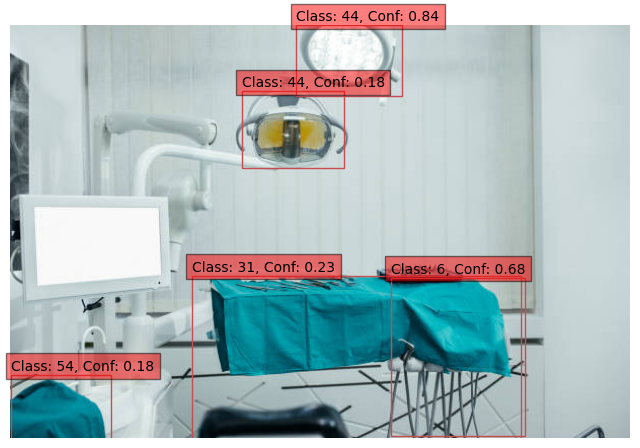

In [ ]:
# Perform inference on the image with a lower confidence threshold
results = model(image_path, conf=0.1)  # Set confidence threshold to 0.1

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        # Verify that the image can be opened
        try:
            img = Image.open(image_path)
        except FileNotFoundError:
            print(f"Error: Image not found at {image_path}")
            break # Exit the loop if image is not found

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.imshow(img)

        # Check if there are any detections
        if img_results.boxes is not None and len(img_results.boxes.xywh) > 0:
            # Iterate over each detection in the image
            # Move the tensor to the CPU before converting to NumPy
            for i, det in enumerate(img_results.boxes.xywh.cpu().numpy()):  # Add .cpu() here
                # Access class ID and confidence from the 'boxes' object directly using the index 'i'
                class_id = int(img_results.boxes.cls[i])
                confidence = img_results.boxes.conf[i]
                bbox = det[:4]

                # Convert YOLO format bounding box to matplotlib format
                xmin, ymin, width, height = bbox
                ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

                # Create a rectangle patch
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

                # Add the rectangle to the plot
                ax.add_patch(rect)

                # Add class label and confidence score
                ax.text(xmin, ymin - 5, f'Class: {class_id}, Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
        else:
            print("No detections found.")

        plt.axis('off')
        plt.show()
else:
    print("No detections found.")


image 1/1 /content/image_2003.jpg: 448x640 1 chair, 1 surgical_light, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: 'person', 36: 'press_to_open', 3

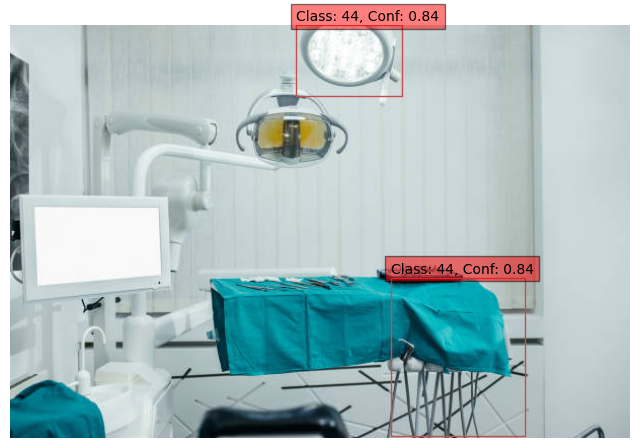


image 1/1 /content/image_2003.jpg: 448x640 1 chair, 1 operating_bed, 2 surgical_lights, 1 waste_bin, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: 'pe

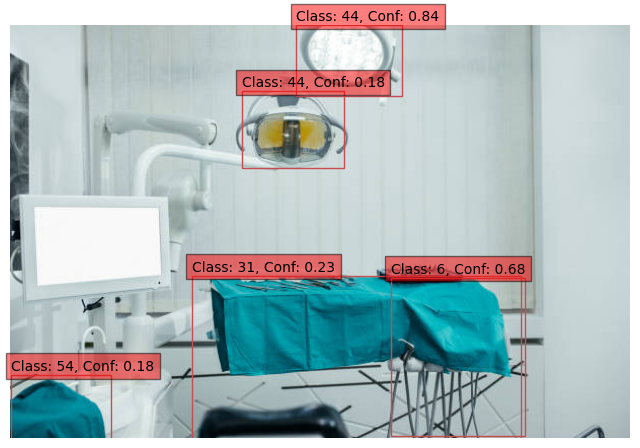

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/image_2003.jpg'

# Perform inference on the image
results = model(image_path)

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        # Verify that the image can be opened
        try:
            img = Image.open(image_path)
        except FileNotFoundError:
            print(f"Error: Image not found at {image_path}")
            break # Exit the loop if image is not found

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.imshow(img)

        # Check if there are any detections
        if img_results.boxes is not None and len(img_results.boxes.xywh) > 0:
            # Iterate over each detection in the image
            # Move the tensor to the CPU before converting to NumPy
            for det in img_results.boxes.xywh.cpu().numpy():
                # Access class ID and confidence from the 'boxes' object directly
                class_id = int(img_results.boxes.cls[0])  # Assuming you want the class of the first detection
                confidence = img_results.boxes.conf[0] # Assuming you want the confidence of the first detection
                bbox = det[:4]

                # Convert YOLO format bounding box to matplotlib format
                xmin, ymin, width, height = bbox
                ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

                # Create a rectangle patch
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

                # Add the rectangle to the plot
                ax.add_patch(rect)

                # Add class label and confidence score
                ax.text(xmin, ymin - 5, f'Class: {class_id}, Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
        else:
            print("No detections found.")

        plt.axis('off')
        plt.show()
else:
    print("No detections found.")
    # Perform inference on the image with a lower confidence threshold
results = model(image_path, conf=0.1)  # Set confidence threshold to 0.1

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        # Verify that the image can be opened
        try:
            img = Image.open(image_path)
        except FileNotFoundError:
            print(f"Error: Image not found at {image_path}")
            break # Exit the loop if image is not found

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.imshow(img)

        # Check if there are any detections
        if img_results.boxes is not None and len(img_results.boxes.xywh) > 0:
            # Iterate over each detection in the image
            # Move the tensor to the CPU before converting to NumPy
            for i, det in enumerate(img_results.boxes.xywh.cpu().numpy()):  # Add .cpu() here
                # Access class ID and confidence from the 'boxes' object directly using the index 'i'
                class_id = int(img_results.boxes.cls[i])
                confidence = img_results.boxes.conf[i]
                bbox = det[:4]

                # Convert YOLO format bounding box to matplotlib format
                xmin, ymin, width, height = bbox
                ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

                # Create a rectangle patch
                rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')

                # Add the rectangle to the plot
                ax.add_patch(rect)

                # Add class label and confidence score
                ax.text(xmin, ymin - 5, f'Class: {class_id}, Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
        else:
            print("No detections found.")

        plt.axis('off')
        plt.show()
else:
    print("No detections found.")


image 1/1 /content/image_2506.jpg: 384x640 1 hospital_bed, 1 staff, 105.1ms
Speed: 2.0ms preprocess, 105.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: 'person', 36: 'press_to_open', 3

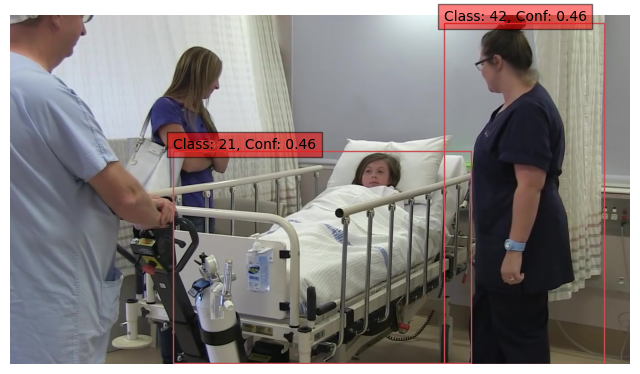

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/image_2506.jpg'

def visualize_detections(image_path, results):
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.imshow(img)

    if results.boxes is not None and len(results.boxes.xywh) > 0:
        for i, det in enumerate(results.boxes.xywh.cpu().numpy()):
            class_id = int(results.boxes.cls[i])
            confidence = results.boxes.conf[i]
            bbox = det[:4]

            xmin, ymin, width, height = bbox
            ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'Class: {class_id}, Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
    else:
        print("No detections found.")

    plt.axis('off')
    plt.show()

# Perform initial inference on the image
results = model(image_path)

if not isinstance(results, list) or len(results[0].boxes.xywh) == 0:
    print("No detections found with the default confidence threshold. Trying with a lower threshold.")
    results = model(image_path, conf=0.1)

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        visualize_detections(image_path, img_results)
else:
    visualize_detections(image_path, results)



image 1/1 /content/image_2506.jpg: 384x640 1 hospital_bed, 1 staff, 20.6ms
Speed: 4.0ms preprocess, 20.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'TV', 1: 'bedrail', 2: 'bedside_monitor', 3: 'bedside_table', 4: 'breathing_tube', 5: 'cabinet', 6: 'chair', 7: 'computer', 8: 'counter', 9: 'countertop', 10: 'curtain', 11: 'dispenser', 12: 'door_handle', 13: 'drawer', 14: 'electrosurgical_unit', 15: 'elevator_panel', 16: 'exam_table', 17: 'faucet', 18: 'foot_board', 19: 'hallway_assist_bar', 20: 'handle', 21: 'hospital_bed', 22: 'hs', 23: 'incubator', 24: 'infusion_pump', 25: 'iv_pole', 26: 'keyboard', 27: 'light_switch', 28: 'medical_drawer', 29: 'medical_waste_container', 30: 'mouse', 31: 'operating_bed', 32: 'overbed_table', 33: 'panda_baby_warmer', 34: 'patient', 35: 'person', 36: 'press_to_open', 37:

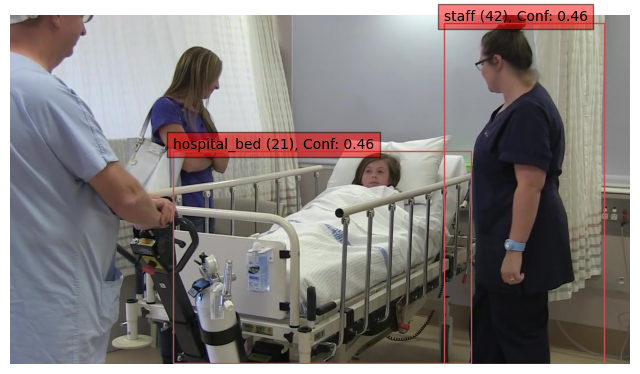

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Define class names and their respective IDs
class_names = {
    0: 'TV',
    1: 'bedrail',
    2: 'bedside_monitor',
    3: 'bedside_table',
    4: 'breathing_tube',
    5: 'cabinet',
    6: 'chair',
    7: 'computer',
    8: 'counter',
    9: 'countertop',
    10: 'curtain',
    11: 'dispenser',
    12: 'door_handle',
    13: 'drawer',
    14: 'electrosurgical_unit',
    15: 'elevator_panel',
    16: 'exam_table',
    17: 'faucet',
    18: 'foot_board',
    19: 'hallway_assist_bar',
    20: 'handle',
    21: 'hospital_bed',
    22: 'hs',
    23: 'incubator',
    24: 'infusion_pump',
    25: 'iv_pole',
    26: 'keyboard',
    27: 'light_switch',
    28: 'medical_drawer',
    29: 'medical_waste_container',
    30: 'mouse',
    31: 'operating_bed',
    32: 'overbed_table',
    33: 'panda_baby_warmer',
    34: 'patient',
    35: 'person',
    36: 'press_to_open',
    37: 'push_latch',
    38: 'restroom_assist_bar',
    39: 'sequential_compression',
    40: 'sink',
    41: 'sofa',
    42: 'staff',
    43: 'surgical_instrument',
    44: 'surgical_light',
    45: 'syringe_pump',
    46: 'table',
    47: 'telephone',
    48: 'toilet',
    49: 'toilet_handle',
    50: 'tv',
    51: 'utility_cart',
    52: 'ventilator',
    53: 'visitor',
    54: 'waste_bin',
    55: 'wheel_chair',
    56: 'xray_bed',
    57: 'xray_machine'
}

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/image_2506.jpg'

def visualize_detections(image_path, results):
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.imshow(img)

    if results.boxes is not None and len(results.boxes.xywh) > 0:
        for i, det in enumerate(results.boxes.xywh.cpu().numpy()):
            class_id = int(results.boxes.cls[i])
            class_name = class_names.get(class_id, "Unknown")
            confidence = results.boxes.conf[i]
            bbox = det[:4]

            xmin, ymin, width, height = bbox
            ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_name} ({class_id}), Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
    else:
        print("No detections found.")

    plt.axis('off')
    plt.show()

# Perform initial inference on the image
results = model(image_path)

if not isinstance(results, list) or len(results[0].boxes.xywh) == 0:
    print("No detections found with the default confidence threshold. Trying with a lower threshold.")
    results = model(image_path, conf=0.1)

# Check the type and structure of the 'results' variable
print(type(results))
print(results)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        visualize_detections(image_path, img_results)
else:
    visualize_detections(image_path, results)



image 1/1 /content/df5c0b78bb1e148fe550464451b93a8e.jpg: 512x640 1 bedside_monitor, 2 curtains, 2 hospital_beds, 98.2ms
Speed: 3.1ms preprocess, 98.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


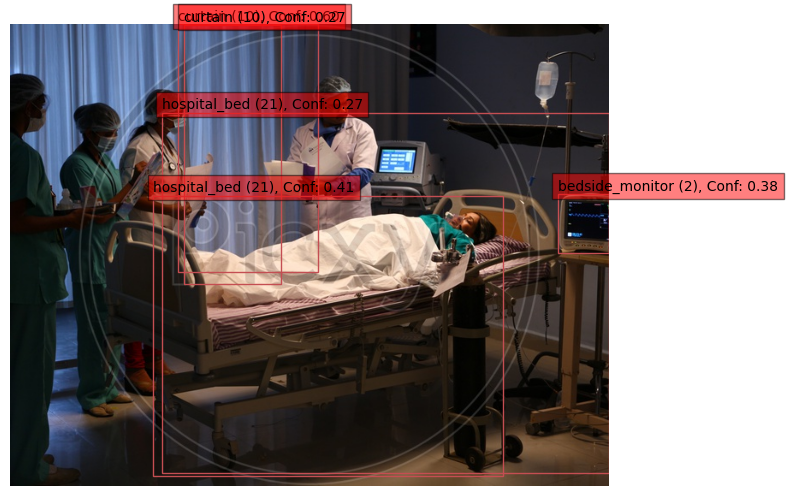

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Define class names and their respective IDs
class_names = {
    0: 'TV',
    1: 'bedrail',
    2: 'bedside_monitor',
    3: 'bedside_table',
    4: 'breathing_tube',
    5: 'cabinet',
    6: 'chair',
    7: 'computer',
    8: 'counter',
    9: 'countertop',
    10: 'curtain',
    11: 'dispenser',
    12: 'door_handle',
    13: 'drawer',
    14: 'electrosurgical_unit',
    15: 'elevator_panel',
    16: 'exam_table',
    17: 'faucet',
    18: 'foot_board',
    19: 'hallway_assist_bar',
    20: 'handle',
    21: 'hospital_bed',
    22: 'hs',
    23: 'incubator',
    24: 'infusion_pump',
    25: 'iv_pole',
    26: 'keyboard',
    27: 'light_switch',
    28: 'medical_drawer',
    29: 'medical_waste_container',
    30: 'mouse',
    31: 'operating_bed',
    32: 'overbed_table',
    33: 'panda_baby_warmer',
    34: 'patient',
    35: 'person',
    36: 'press_to_open',
    37: 'push_latch',
    38: 'restroom_assist_bar',
    39: 'sequential_compression',
    40: 'sink',
    41: 'sofa',
    42: 'staff',
    43: 'surgical_instrument',
    44: 'surgical_light',
    45: 'syringe_pump',
    46: 'table',
    47: 'telephone',
    48: 'toilet',
    49: 'toilet_handle',
    50: 'tv',
    51: 'utility_cart',
    52: 'ventilator',
    53: 'visitor',
    54: 'waste_bin',
    55: 'wheel_chair',
    56: 'xray_bed',
    57: 'xray_machine'
}

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/df5c0b78bb1e148fe550464451b93a8e.jpg'

def visualize_detections(image_path, results):
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.imshow(img)

    if results.boxes is not None and len(results.boxes.xywh) > 0:
        for i, det in enumerate(results.boxes.xywh.cpu().numpy()):
            class_id = int(results.boxes.cls[i])
            class_name = class_names.get(class_id, "Unknown")
            confidence = results.boxes.conf[i]
            bbox = det[:4]

            xmin, ymin, width, height = bbox
            ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_name} ({class_id}), Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
    else:
        print("No detections found.")

    plt.axis('off')
    plt.show()

# Perform initial inference on the image
results = model(image_path)

# Check for detections
if isinstance(results, list) and len(results) > 0 and len(results[0].boxes.xywh) == 0:
    print("No detections found with the default confidence threshold. Trying with a lower threshold.")
    results = model(image_path, conf=0.1)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        visualize_detections(image_path, img_results)
else:
    visualize_detections(image_path, results)



image 1/1 /content/ideal-healthcare-background-with-surrealist-blurry-hospital-scene-ai-generative-free-photo.jpg: 448x640 2 bedrails, 3 hospital_beds, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 9.8ms postprocess per image at shape (1, 3, 448, 640)


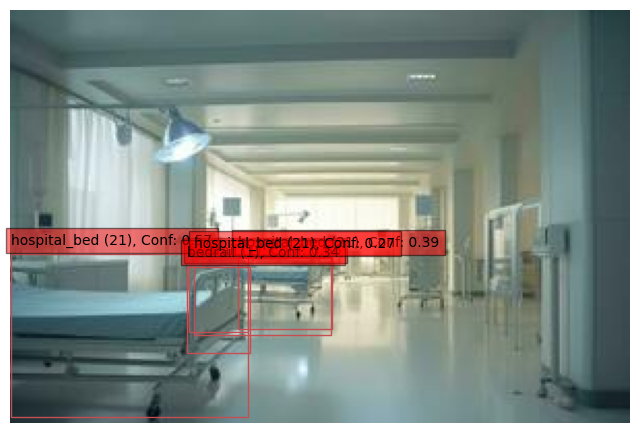

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Define class names and their respective IDs
class_names = {
    0: 'TV',
    1: 'bedrail',
    2: 'bedside_monitor',
    3: 'bedside_table',
    4: 'breathing_tube',
    5: 'cabinet',
    6: 'chair',
    7: 'computer',
    8: 'counter',
    9: 'countertop',
    10: 'curtain',
    11: 'dispenser',
    12: 'door_handle',
    13: 'drawer',
    14: 'electrosurgical_unit',
    15: 'elevator_panel',
    16: 'exam_table',
    17: 'faucet',
    18: 'foot_board',
    19: 'hallway_assist_bar',
    20: 'handle',
    21: 'hospital_bed',
    22: 'hs',
    23: 'incubator',
    24: 'infusion_pump',
    25: 'iv_pole',
    26: 'keyboard',
    27: 'light_switch',
    28: 'medical_drawer',
    29: 'medical_waste_container',
    30: 'mouse',
    31: 'operating_bed',
    32: 'overbed_table',
    33: 'panda_baby_warmer',
    34: 'patient',
    35: 'person',
    36: 'press_to_open',
    37: 'push_latch',
    38: 'restroom_assist_bar',
    39: 'sequential_compression',
    40: 'sink',
    41: 'sofa',
    42: 'staff',
    43: 'surgical_instrument',
    44: 'surgical_light',
    45: 'syringe_pump',
    46: 'table',
    47: 'telephone',
    48: 'toilet',
    49: 'toilet_handle',
    50: 'tv',
    51: 'utility_cart',
    52: 'ventilator',
    53: 'visitor',
    54: 'waste_bin',
    55: 'wheel_chair',
    56: 'xray_bed',
    57: 'xray_machine'
}

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/ideal-healthcare-background-with-surrealist-blurry-hospital-scene-ai-generative-free-photo.jpg'

def visualize_detections(image_path, results):
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.imshow(img)

    if results.boxes is not None and len(results.boxes.xywh) > 0:
        for i, det in enumerate(results.boxes.xywh.cpu().numpy()):
            class_id = int(results.boxes.cls[i])
            class_name = class_names.get(class_id, "Unknown")
            confidence = results.boxes.conf[i]
            bbox = det[:4]

            xmin, ymin, width, height = bbox
            ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_name} ({class_id}), Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
    else:
        print("No detections found.")

    plt.axis('off')
    plt.show()

# Perform initial inference on the image
results = model(image_path)

# Check for detections
if isinstance(results, list) and len(results) > 0 and len(results[0].boxes.xywh) == 0:
    print("No detections found with the default confidence threshold. Trying with a lower threshold.")
    results = model(image_path, conf=0.1)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        visualize_detections(image_path, img_results)
else:
    visualize_detections(image_path, results)



image 1/1 /content/Screenshot 2024-06-13 041219.png: 352x640 1 bedside_monitor, 1 hospital_bed, 4 staffs, 1 surgical_light, 96.8ms
Speed: 2.2ms preprocess, 96.8ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


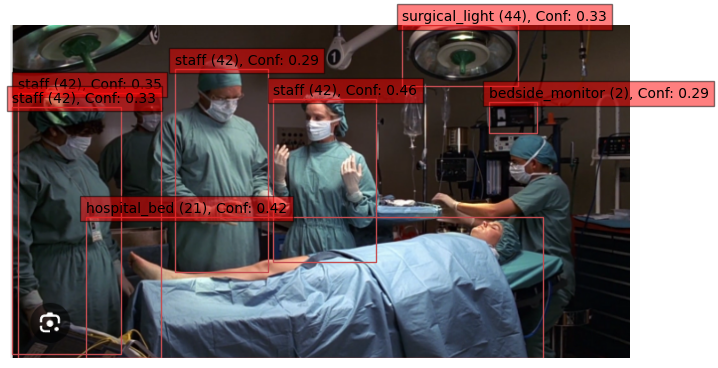

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Define class names and their respective IDs
class_names = {
    0: 'TV',
    1: 'bedrail',
    2: 'bedside_monitor',
    3: 'bedside_table',
    4: 'breathing_tube',
    5: 'cabinet',
    6: 'chair',
    7: 'computer',
    8: 'counter',
    9: 'countertop',
    10: 'curtain',
    11: 'dispenser',
    12: 'door_handle',
    13: 'drawer',
    14: 'electrosurgical_unit',
    15: 'elevator_panel',
    16: 'exam_table',
    17: 'faucet',
    18: 'foot_board',
    19: 'hallway_assist_bar',
    20: 'handle',
    21: 'hospital_bed',
    22: 'hs',
    23: 'incubator',
    24: 'infusion_pump',
    25: 'iv_pole',
    26: 'keyboard',
    27: 'light_switch',
    28: 'medical_drawer',
    29: 'medical_waste_container',
    30: 'mouse',
    31: 'operating_bed',
    32: 'overbed_table',
    33: 'panda_baby_warmer',
    34: 'patient',
    35: 'person',
    36: 'press_to_open',
    37: 'push_latch',
    38: 'restroom_assist_bar',
    39: 'sequential_compression',
    40: 'sink',
    41: 'sofa',
    42: 'staff',
    43: 'surgical_instrument',
    44: 'surgical_light',
    45: 'syringe_pump',
    46: 'table',
    47: 'telephone',
    48: 'toilet',
    49: 'toilet_handle',
    50: 'tv',
    51: 'utility_cart',
    52: 'ventilator',
    53: 'visitor',
    54: 'waste_bin',
    55: 'wheel_chair',
    56: 'xray_bed',
    57: 'xray_machine'
}

# Load the trained model with the best weights
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Path to the uploaded image
image_path = '/content/Screenshot 2024-06-13 041219.png'

def visualize_detections(image_path, results):
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.imshow(img)

    if results.boxes is not None and len(results.boxes.xywh) > 0:
        for i, det in enumerate(results.boxes.xywh.cpu().numpy()):
            class_id = int(results.boxes.cls[i])
            class_name = class_names.get(class_id, "Unknown")
            confidence = results.boxes.conf[i]
            bbox = det[:4]

            xmin, ymin, width, height = bbox
            ymin, xmin, ymax, xmax = ymin - height / 2, xmin - width / 2, ymin + height / 2, xmin + width / 2

            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_name} ({class_id}), Conf: {confidence:.2f}', bbox=dict(facecolor='red', alpha=0.5))
    else:
        print("No detections found.")

    plt.axis('off')
    plt.show()

# Perform initial inference on the image
results = model(image_path)

# Check for detections
if isinstance(results, list) and len(results) > 0 and len(results[0].boxes.xywh) == 0:
    print("No detections found with the default confidence threshold. Trying with a lower threshold.")
    results = model(image_path, conf=0.1)

# Visualize the detections on the image
if isinstance(results, list):
    for img_results in results:
        visualize_detections(image_path, img_results)
else:
    visualize_detections(image_path, results)


In [ ]:
import cv2

# Load the trained model
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Load the video
video_path = '/content/Y2meta.app - The Hospital Collection _ Medical and Health Care Stock Footage in HD and 4K by FILMPAC.mp4'
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection on the frame
    results = model(frame)

    # Draw bounding boxes on the frame, iterating over the Results objects
    if isinstance(results, list):
        annotated_frame = results[0].plot()  # Assuming you want to plot results for the first frame
    else:
        annotated_frame = results.plot()

    # Write the frame to the output video
    out.write(annotated_frame)

    # Optionally display the frame
    cv2.imshow('Frame', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 1 staff, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files # Import files for downloading

# Load the trained model
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Load the video
video_path = '/content/Y2meta.app - The Hospital Collection _ Medical and Health Care Stock Footage in HD and 4K by FILMPAC.mp4'
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30.0, (int(cap.get(3)), int(cap.get(4)))) # Change output filename to 'result.mp4'

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection on the frame
    results = model(frame)

    # Draw bounding boxes on the frame
    if isinstance(results, list):
        annotated_frame = results[0].plot()
    else:
        annotated_frame = results.plot()

    # Write the frame to the output video
    out.write(annotated_frame)

    # Optionally display the frame
    cv2_imshow(annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Download the 'result.mp4' file
files.download('result.mp4') # Add this line to download the output video

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import the Colab patch for imshow

# Load the trained model
model = YOLO('/content/gdrive/MyDrive/Hospital_Scene_Data/runs/detect/train/weights/best.pt')

# Load the video
video_path = '/content/Y2meta.app - The Hospital Collection _ Medical and Health Care Stock Footage in HD and 4K by FILMPAC.mp4'
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection on the frame
    results = model(frame)

    # Draw bounding boxes on the frame, iterating over the Results objects
    if isinstance(results, list):
        annotated_frame = results[0].plot()  # Assuming you want to plot results for the first frame
    else:
        annotated_frame = results.plot()

    # Write the frame to the output video
    out.write(annotated_frame)

    # Optionally display the frame using cv2_imshow
    cv2_imshow(annotated_frame) # Use cv2_imshow instead of cv2.imshow
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()